Face Detection / Localisation

Mount Google Drive

Import libraries

Load Cascade Classifier

Create function to detect face using detectMultiScale()

Face detection/localisation

Face detection on webcam image

Face detection on webcam video

1. Mount Google Drive

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


2. Import Libraries

In [ ]:
# import libraries of python OpenCV
import cv2
from google.colab.patches import cv2_imshow # for image display

# Load from Google Drive.
image_DIR = "/content/gdrive/MyDrive/CVNLP Colab Notebooks/abba.png"
cascade_DIR = "/content/gdrive/MyDrive/CVNLP Colab Notebooks/haarcascade_frontalface_default.xml"

3. Load Cascade Classifier

The haarcascade_frontalface_default.xml file is a pre-trained face detector, provided by the developers and maintainers of the OpenCV library.

What's cascade?

* a waterfall or series of waterfalls
* Like a series of waterfalls, the OpenCV cascade breaks the problem of detecting faces into multiple stages.
* For each block, it does a very rough and quick test. If that passes, it does a slightly more detailed test, and so on.
* The algorithm may have 30 to 50 of these stages or cascades, and it will only detect a face if all stages pass.

Advantage:

* majority of the picture will return a negative during the first few stages, which means the algorithm won’t waste time testing all 6,000 features on it.
* Instead of taking hours, face detection can now be done in real time.

In [ ]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascade_DIR)

# Read the image
image = cv2.imread(image_DIR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

4. Create function to detect face using detectMultiScale()
detectMultiScale function → a general function that detects objects. Since we are calling it on the face cascade, face is our object of interest. There are 4 parameters:

* gray: the input, grayscale image.

* scaleFactor: since some faces may be closer to the camera, they would appear bigger than the faces in the back. The scale factor compensates for this.

The detection algorithm uses a moving window to detect objects

* minNeighbors: defines how many objects are detected near the current one before it declares the face found. The cascade classifier will detect multiple windows around a face.

* minSize: a tuple of width and height (in pixels) indicating the window’s minimum size. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.

You may need to re-tune parameter 3 and 4.

In real life, you would experiment with different values for the window size and scale factor.

In [ ]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

5. Face detection / localisation
The function returns a list of rectangles in which it believes it found a face.
Next, we will loop over where it thinks it found something.

This function returns 4 values:

* the x and y location of the rectangle,
* the rectangle’s width and height (w , h).

We use these values to draw a rectangle using the built-in rectangle function → cv2.rectangle

Found 4 faces!


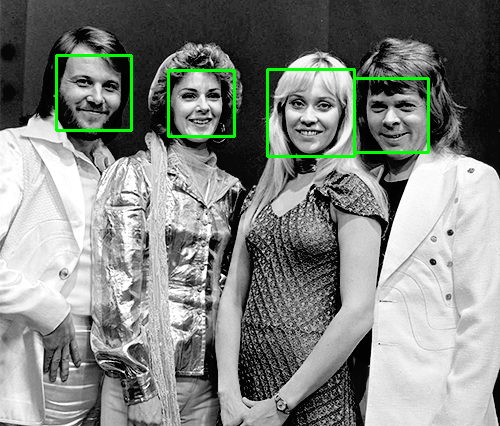

-1

In [ ]:
print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)

[INFO] loading face detector...
[INFO] performing face detection...
[INFO] 2 faces detected...


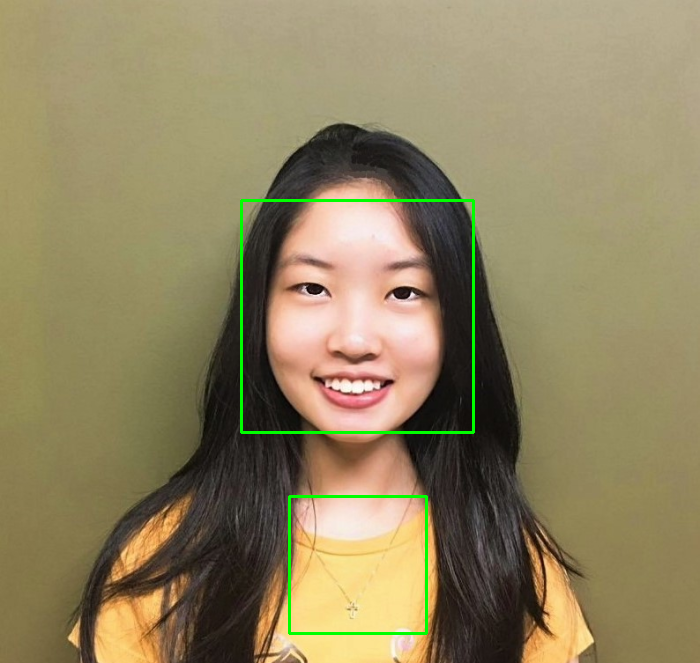

-1

In [ ]:
# load image form Google Drive
image_2 = cv2.imread("/content/gdrive/MyDrive/Ann (3).jpg")
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier("/content/gdrive/MyDrive/CVNLP Colab Notebooks/haarcascade_frontalface_default.xml")

# resize image
r = 700 / image_2.shape[1]
dim = (700, int(image_2.shape[0] * r))
resized = cv2.resize(image_2, dim, interpolation = cv2.INTER_AREA)

print("[INFO] performing face detection...")
rects = detector.detectMultiScale(
    resized,         # i/p
    scaleFactor=1.1, # fine-tune
    minNeighbors=3,  # fine-tune
    minSize=(30, 30)
    )

print("[INFO] {} faces detected...".format(len(rects)))
# loop over the bounding boxes

for (x, y, w, h) in rects:	
  # draw the face bounding box on the image
	cv2.rectangle(resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
cv2_imshow(resized)
cv2.waitKey(0)

Haar cascades tend to be very sensitive to detectMultiScale parameters → resulted in false positive detection.

* The scaleFactor and minNeighbors are the parameters we tune most often.

* When applying face detection, Haar cascades are sliding a window from left-to-right and top-to-bottom across the image, computing integral images along the way.

* When a Haar cascade thinks a face is in a region, it will return a higher confidence score. If there are enough high confidence scores in a given area, then the Haar cascade will report a positive detection.

* By increasing minNeighbors → then Haar cascades is set to find more neighbors, thus removing the false-positive detection.

6. Face Detection on Webcam Image

We will utilize code within Google Colab's Code Snippets that has a variety of useful code functions to perform various tasks.

👉 use the code snippet for Camera Capture to utilize computer's webcam.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
face_cascade = cv2.CascadeClassifier(cascade_DIR)

## == Colab's Code Snippets for Camera Capture to utilize computer's webcam ==
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  
  ## == Append the following code to Camera Capture Snippets ==
  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


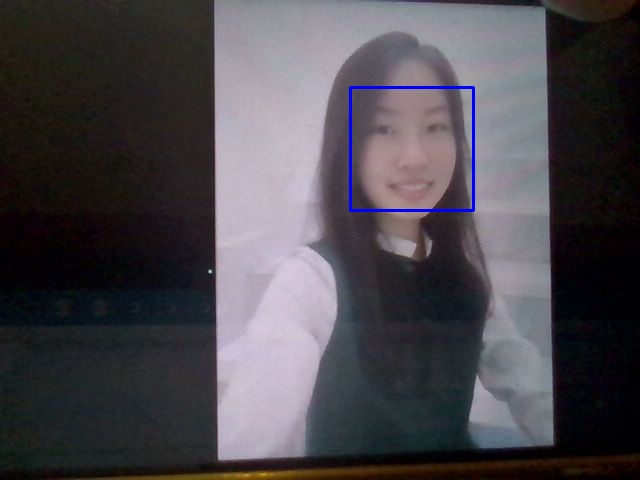

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo2.jpg


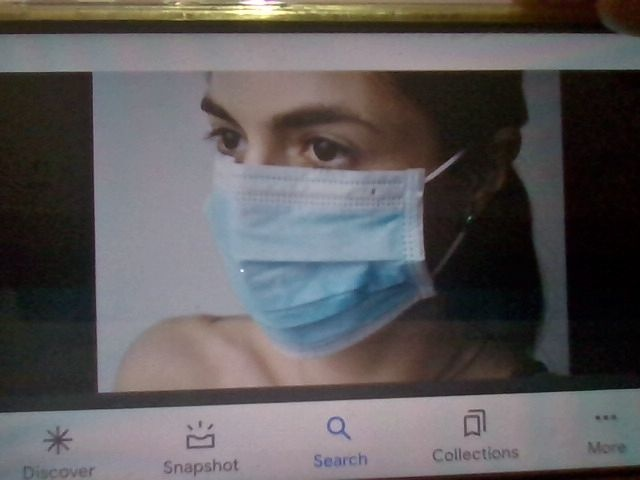

In [ ]:
try:
  filename = take_photo('photo2.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

7. Face detection on webcam video

Running code on webcam video is a little more complex than images.

Steps:

1. Start a video stream using webcam as input.
2. Then run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s).
3. Then overlay the bounding box image back onto the next frame of our video stream.

In [ ]:
# JavaScript to properly create live video stream using webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    # faces = face_cascade.detectMultiScale(gray)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2, # fine-tune
        minNeighbors=10,  # fine-tune
        minSize=(30, 30)
        )
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

Base64 is an encoding algorithm that converts any characters, binary data, and even images or sound files into a readable string, which can be saved or transported over the network without data loss.

print(bbox_bytes)

copy/paste the result to base64 to image to view the overlay bounding box image



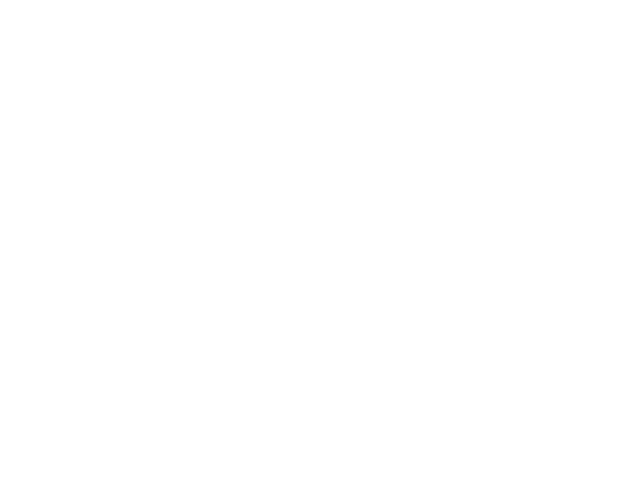

In [ ]:
print(bbox_bytes)